In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model

In [2]:
bike_dataset = pd.read_csv('Bike Price Dataset.csv')

In [3]:
bike_dataset.head() 

,Brand_Name,Model_Name,Brand_Origin,CC,Milage,Top_Speed,Category,Price
0,BAJAJ,Glamour,India,124.7,81.1,90.0,Adventure,114490
1,BAJAJ,HF Deluxe Self,India,97.2,82.9,85.0,Adventure,94490
2,BAJAJ,Passion Xpro Disc,India,109.1,85.6,87.0,Adventure,106490
3,BAJAJ,Xtreme Sports Single Disc,India,149.2,65.1,107.0,Adventure,174900
4,BAJAJ,Ignitor,India,124.7,55.0,102.0,Air-Cooled,121490


In [4]:
print(bike_dataset.Brand_Name.value_counts())
print(bike_dataset.Brand_Origin.value_counts())
print(bike_dataset.Category.value_counts())

RUNNER      36
HONDA       34
BAJAJ       32
HERO        30
H Power     30
YAMAHA      26
TVS         20
Mahindra    17
SUZUKI      16
Keeway      13
BMW         12
Walton      12
LIFAN       11
APRILIA     11
TVS\n        1
Name: Brand_Name, dtype: int64
India         119
Japan          67
Bangladesh     58
China          34
Germany        12
Italy‎         11
Name: Brand_Origin, dtype: int64
Standard          72
Roadstar          64
Naked             63
Sport             42
Scooter           23
Street Bike       12
Air-Cooled         7
Cruiser            7
Adventure          4
Heritage           3
Off Road           2
Commuter           1
Urban Mobility     1
Name: Category, dtype: int64


In [5]:
bike_dataset.replace({'Brand_Name':{'HONDA':0,'BAJAJ':1,'H Power':2,'HERO':3,'YAMAHA':4,'RUNNER':5,'TVS':6,'TVS\n':6,'SUZUKI':7,'Mahindra':8,
                                    'Keeway':9,'Walton':10,'BMW':11,'APRILIA':12,'LIFAN':13}},inplace=True)
bike_dataset.replace({'Brand_Origin':{'India':0,'Japan':1,'Bangladesh':2,'China':3,'Germany':4,'Italy‎':5}},inplace=True)
bike_dataset.replace({'Category':{'Standard':0,'Sport':1,'Scooter':2,'Street Bike':3,'Air-Cooled':4,'Cruiser':5,
                                  'Adventure':6,'Heritage':7,'Off Road':8,'Commuter':9,'Urban Mobility':10,'Naked':11,'Roadstar':12}},inplace=True)

In [6]:
bike_dataset

,Brand_Name,Model_Name,Brand_Origin,CC,Milage,Top_Speed,Category,Price
0,1,Glamour,0,124.7,81.1,90.0,6,114490
1,1,HF Deluxe Self,0,97.2,82.9,85.0,6,94490
2,1,Passion Xpro Disc,0,109.1,85.6,87.0,6,106490
3,1,Xtreme Sports Single Disc,0,149.2,65.1,107.0,6,174900
4,1,Ignitor,0,124.7,55.0,102.0,4,121490
...,...,...,...,...,...,...,...,...
296,10,Fusion 110,2,107.0,45.0,90.0,3,100000
297,10,Cruize,2,97.0,45.0,80.0,3,81000
298,10,Stylex Plus,2,97.0,70.0,80.0,3,85000
299,10,Stylex,2,98.0,45.0,80.0,3,65550


In [7]:
X = bike_dataset.drop(['Model_Name','Price'],axis=1)
Y = bike_dataset['Price']

In [8]:
print(X)

     Brand_Name  Brand_Origin     CC  Milage  Top_Speed  Category
0             1             0  124.7    81.1       90.0         6
1             1             0   97.2    82.9       85.0         6
2             1             0  109.1    85.6       87.0         6
3             1             0  149.2    65.1      107.0         6
4             1             0  124.7    55.0      102.0         4
..          ...           ...    ...     ...        ...       ...
296          10             2  107.0    45.0       90.0         3
297          10             2   97.0    45.0       80.0         3
298          10             2   97.0    70.0       80.0         3
299          10             2   98.0    45.0       80.0         3
300          10             2  125.0    45.0      100.0        10

[301 rows x 6 columns]


In [9]:
print(Y)

0      114490
1       94490
2      106490
3      174900
4      121490
        ...  
296    100000
297     81000
298     85000
299     65550
300     95500
Name: Price, Length: 301, dtype: int64


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [11]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((240, 6), (240,), (61, 6), (61,))

# **Linear Regression**

In [12]:
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [14]:
training_data_prediction = lin_reg_model.predict(X_train)

In [15]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  100656.98082272237
Mean Absolute Error:  264.43707874283916
Mean Squared Error:  10131827788.345898
R2 score:  0.8946173629602691


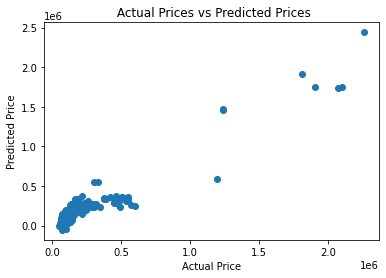

In [16]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [17]:
test_data_prediction = lin_reg_model.predict(X_test)

In [18]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  380400.3968963863
Mean Absolute Error:  332.69266298348674
Mean Squared Error:  144704461958.92822
R2 score:  0.657313039601016


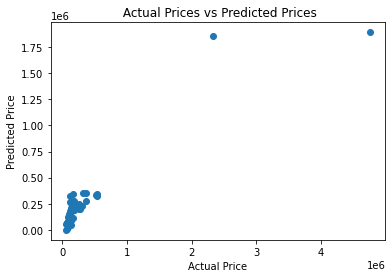

In [19]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Lasso Regression**

In [20]:
lass_reg_model = Lasso()

In [21]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [22]:
training_data_prediction = lass_reg_model.predict(X_train)

In [23]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  100656.98082961793
Mean Absolute Error:  264.43692571955637
Mean Squared Error:  10131827789.73407
R2 score:  0.8946173629458305


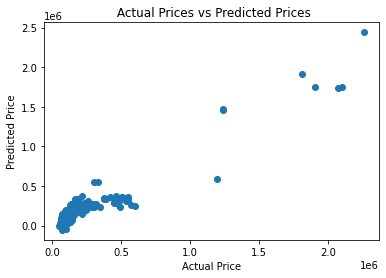

In [24]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [25]:
test_data_prediction = lass_reg_model.predict(X_test)

In [26]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  380400.4649061858
Mean Absolute Error:  332.6928888554765
Mean Squared Error:  144704513700.8423
R2 score:  0.6573129170665826


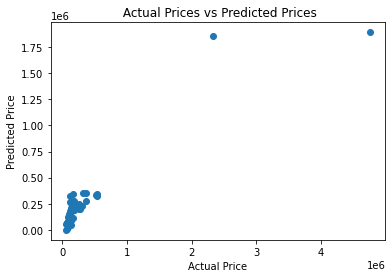

In [27]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Extreme Gradient Boosting**

In [28]:
model = XGBRegressor()

In [29]:
model.fit(X_train, Y_train)

[12:12:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [30]:
training_data_prediction = model.predict(X_train)

In [31]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  31832.68852268123
Mean Absolute Error:  148.02312666825355
Mean Squared Error:  1013320058.5820414
R2 score:  0.9894603084291009


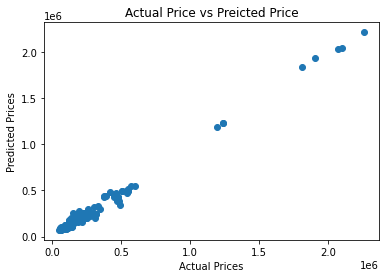

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [33]:
test_data_prediction = model.predict(X_test)

In [34]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  363935.2953444379
Mean Absolute Error:  296.5083242462782
Mean Squared Error:  132448899197.44324
R2 score:  0.686336481545082


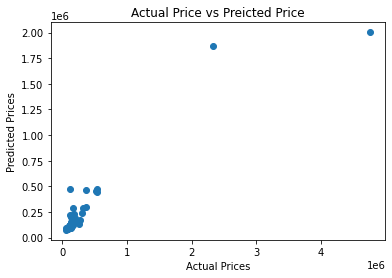

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Support Vector Machine**

In [36]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train, Y_train)
training_data_prediction = svr_lin.predict(X_train)

In [37]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  125150.9803944181
Mean Absolute Error:  247.3281791104351
Mean Squared Error:  15662767893.684025
R2 score:  0.8370892381455364


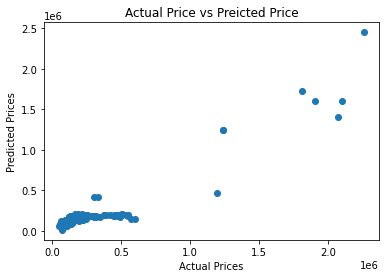

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [39]:
test_data_prediction = model.predict(X_test)

In [40]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  363935.2953444379
Mean Absolute Error:  296.5083242462782
Mean Squared Error:  132448899197.44324
R2 score:  0.686336481545082


# **Bayesian regression**

In [41]:
bay = linear_model.BayesianRidge()
bay.fit(X_train, Y_train)
training_data_prediction = bay.predict(X_train)

In [42]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  100809.37343417115
Mean Absolute Error:  263.3391259157407
Mean Squared Error:  10162529772.190174
R2 score:  0.894298027092403


In [43]:
test_data_prediction = model.predict(X_test)

In [44]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  363935.2953444379
Mean Absolute Error:  296.5083242462782
Mean Squared Error:  132448899197.44324
R2 score:  0.686336481545082


# **Ada Boost**

In [45]:
from sklearn.ensemble import AdaBoostRegressor

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(X_train, Y_train)
training_data_prediction = Ada_Boost.predict(X_train)

In [46]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  64325.91936875387
Mean Absolute Error:  236.71580282903918
Mean Squared Error:  4137823902.635424
R2 score:  0.9569618825373915


In [47]:
test_data_prediction = lin_reg_model.predict(X_test)

In [48]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  380400.3968963863
Mean Absolute Error:  332.69266298348674
Mean Squared Error:  144704461958.92822
R2 score:  0.657313039601016
